In [1]:
import numpy as np
import pandas as pd
import os
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
from keras.preprocessing import image
from skimage import exposure

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def get_image(location):
    img = imread(location)
    img = img / 255.
    return img

In [5]:
img = get_image('Crop/'+os.listdir('Crop')[1])
img.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(283, 283)

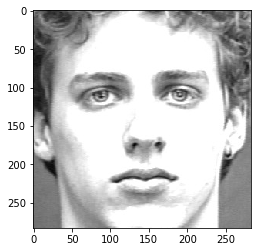

In [7]:
plt.imshow(img,cmap='gray')
plt.show()

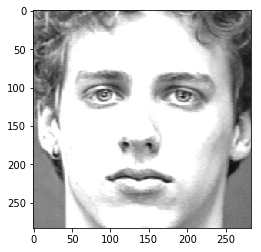

In [10]:
def random_flip(img, u=0.5):
    if np.random.random() < u:
        img = image.flip_axis(img, 1)
    return img
plt.imshow(random_flip(img, u=1.5),cmap='gray')
plt.show()

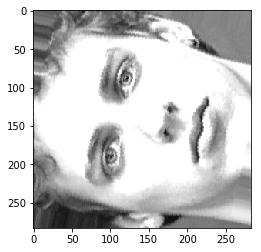

In [18]:
def rotate(x, theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    x = x.reshape((h,w,1))
    transform_matrix = image.transform_matrix_offset_center(rotation_matrix, h, w)
    x = image.apply_transform(x, transform_matrix, channel_axis,fill_mode, cval)
    return x[:,:,0]

def random_rotate(img, rotate_limit=(-90, 90), u=0.5):
    if np.random.random() < u:
        theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1])
        img = rotate(img, theta)
    return img
plt.imshow(random_rotate(img, u=1.5),cmap='gray')
plt.show()

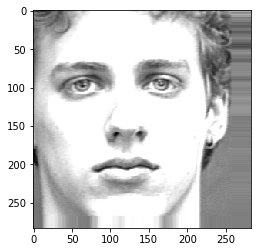

In [19]:
def shift(x, wshift, hshift, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    h, w = x.shape[row_axis], x.shape[col_axis]
    x = x.reshape((h,w,1))
    tx = hshift * h
    ty = wshift * w
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    transform_matrix = translation_matrix  # no need to do offset
    x = image.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x[:,:,0]

def random_shift(img, w_limit=(-0.1, 0.1), h_limit=(-0.1, 0.1), u=0.5):
    if np.random.random() < u:
        wshift = np.random.uniform(w_limit[0], w_limit[1])
        hshift = np.random.uniform(h_limit[0], h_limit[1])
        img = shift(img, wshift, hshift)
    return img
plt.imshow(random_shift(img, u=1.5),cmap='gray')
plt.show()

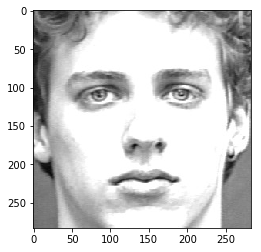

In [33]:
def zoom(x, zx, zy, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    zoom_matrix = np.array([[zx, 0, 0],
                            [0, zy, 0],
                            [0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    x = x.reshape((h,w,1))
    transform_matrix = image.transform_matrix_offset_center(zoom_matrix, h, w)
    x = image.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x[:,:,0]

def random_zoom(img, zoom_range=(0.8, 1.0), u=0.5):
    if np.random.random() < u:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
        img = zoom(img, zx, zy)
    return img
plt.imshow(random_zoom(img, u=1.5),cmap='gray')
plt.show()

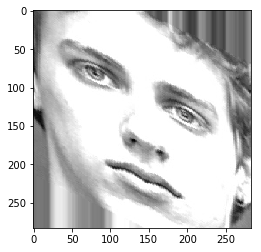

In [34]:
def shear(x, shear, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    shear_matrix = np.array([[1, -np.sin(shear), 0],
                             [0, np.cos(shear), 0],
                             [0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    x = x.reshape((h,w,1))
    transform_matrix = image.transform_matrix_offset_center(shear_matrix, h, w)
    x = image.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x[:,:,0]

def random_shear(img, intensity_range=(-0.5, 0.5), u=0.5):
    if np.random.random() < u:
        sh = np.random.uniform(-intensity_range[0], intensity_range[1])
        img = shear(img, sh)
    return img
plt.imshow(random_shear(img, u=1.5),cmap='gray')
plt.show()

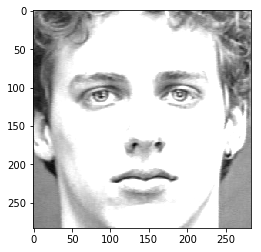

In [37]:
def random_brightness(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        img = alpha * img
        img = np.clip(img, 0., 1.)
    return img
plt.imshow(random_brightness(img, u=1.5),cmap='gray')
plt.show()

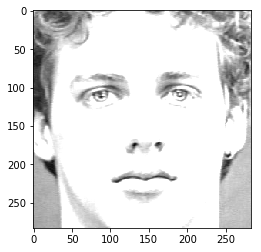

In [38]:
def random_contrast(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        gray = img
        gray = (3.0 * (1.0 - alpha) / gray.size) * np.sum(gray)
        img = alpha * img + gray
        img = np.clip(img, 0., 1.)
    return img
plt.imshow(random_contrast(img, u=1.5),cmap='gray')
plt.show()

In [42]:
def combine(img):
    const_flip = np.random.random()
    const_rotate = np.random.random()
    const_shift = np.random.random()
    const_zoom = np.random.random()
    const_shear = np.random.random()
    const_brightness = np.random.random()
    const_contrast = np.random.random()
    img = random_flip(img,u=const_flip)
    img = random_rotate(img,u=const_rotate)
    img = random_shift(img,u=const_shift)
    img = random_zoom(img,u=const_zoom)
    img = random_shear(img,u=const_shear)
    img = random_brightness(img,u=const_brightness)
    return random_contrast(img,u=const_contrast)

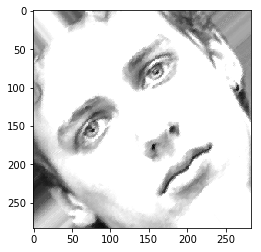

In [43]:
plt.imshow(combine(img),cmap='gray')
plt.show()